# Análise de Imagens de Sensoriamento Remoto

Artur Chiaperini Grover

-------

#### Bibliotecas

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

-------

## 1) PAN Sharpening

In [2]:
r = PIL.Image.open('../images/sjc_red.png')
g = PIL.Image.open('../images/sjc_grn.png')
b = PIL.Image.open('../images/sjc_blu.png')
nir = PIL.Image.open('../images/sjc_nir.png')
pan = PIL.Image.open('../images/sjc_pan.png')

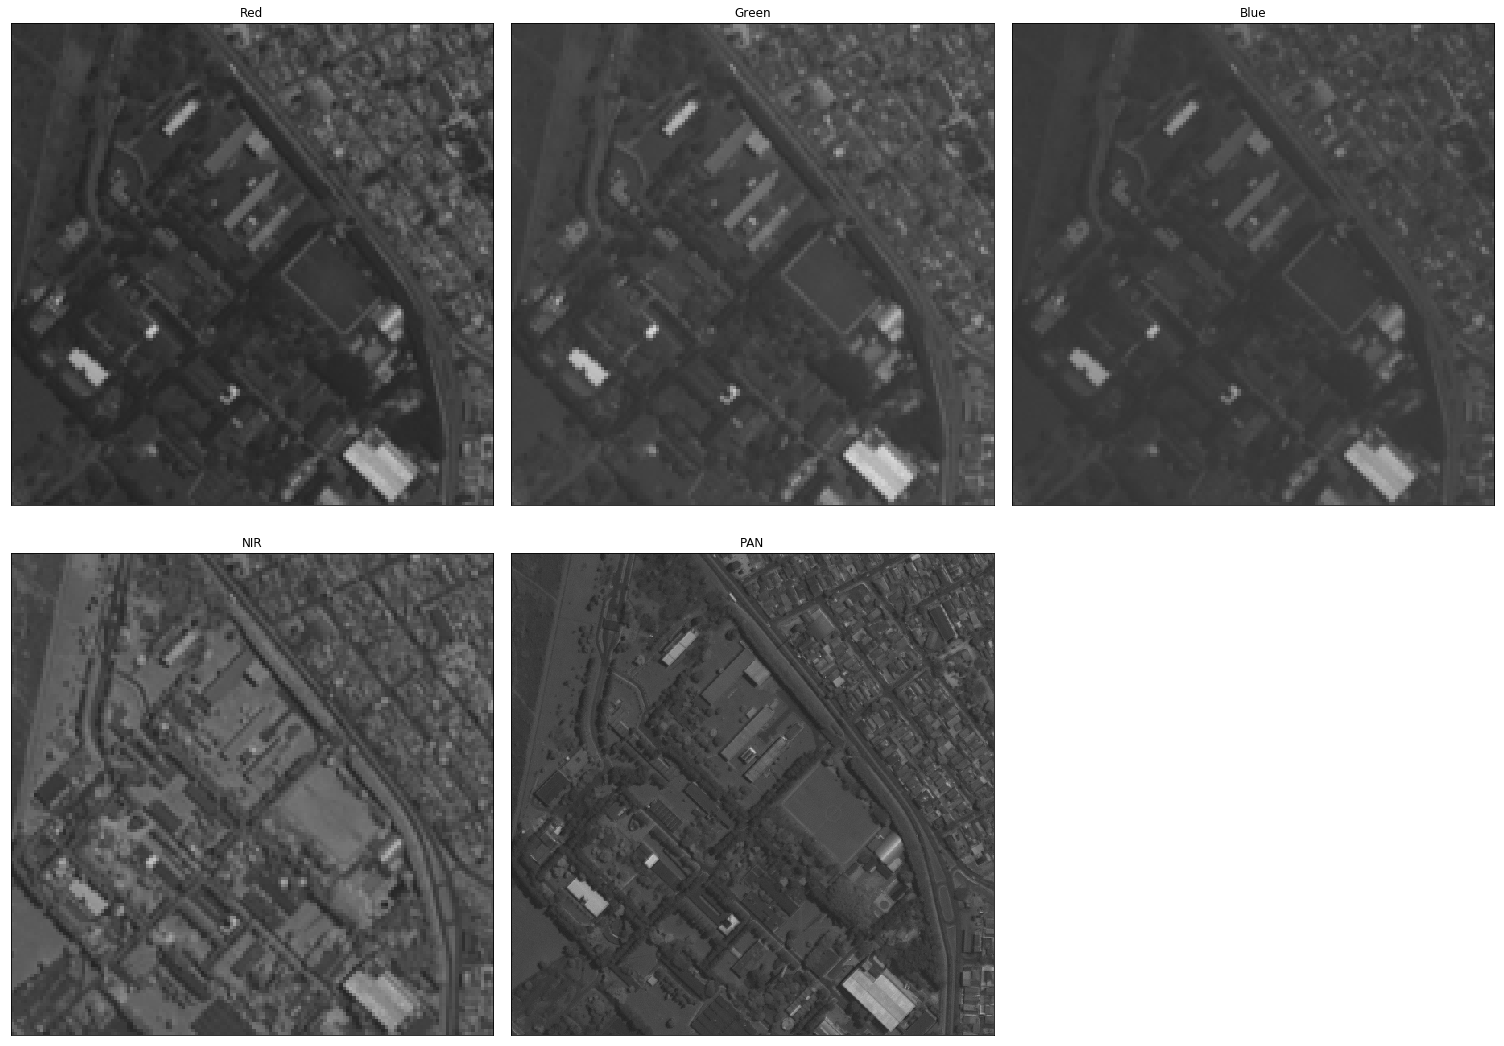

In [3]:
fig = plt.figure(figsize = (21,15))

plt.subplot(2, 3, 1)
plt.imshow(r, cmap = 'gray')
plt.title('Red')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(g, cmap = 'gray')
plt.title('Green')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 3)
plt.imshow(b, cmap = 'gray')
plt.title('Blue')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 4)
plt.imshow(nir, cmap = 'gray')
plt.title('NIR')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(pan, cmap = 'gray')
plt.title('PAN')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

In [4]:
print(np.asarray(r).shape)
print(np.asarray(g).shape)
print(np.asarray(b).shape)
print(np.asarray(nir).shape)
print(np.asarray(pan).shape)

(150, 150)
(150, 150)
(150, 150)
(150, 150)
(600, 600)


Depois de carregar as imagens, para realizar o PAN-Sharpening, precisamos que as bandas ```R```, ```G```, ```B``` e ```NIR``` estejam com as mesmas dimensões que a banda ```PAN```.

Na célula de cima podemos ver que a banda ```PAN``` tem dimensões $(600, 600)$, enquanto que as demais bandas tem dimensões $(150, 150)$.

In [5]:
r = r.resize((600, 600), resample = PIL.Image.BICUBIC)
g = g.resize((600, 600), resample = PIL.Image.BICUBIC)
b = b.resize((600, 600), resample = PIL.Image.BICUBIC)
nir = nir.resize((600, 600), resample = PIL.Image.BICUBIC)

In [6]:
print(np.asarray(r).shape)

(600, 600)


In [7]:
rgb = PIL.Image.merge(mode = 'RGB', bands = [r, g, b])

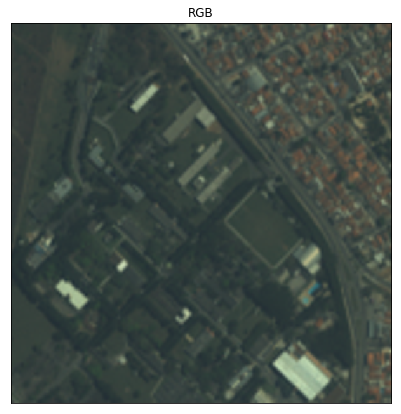

In [8]:
fig = plt.figure(figsize = (15, 7))

plt.imshow(rgb)
plt.title('RGB')
plt.xticks([])
plt.yticks([])

plt.show()

In [9]:
nirrg = PIL.Image.merge(mode = 'RGB', bands = [nir, r, g])

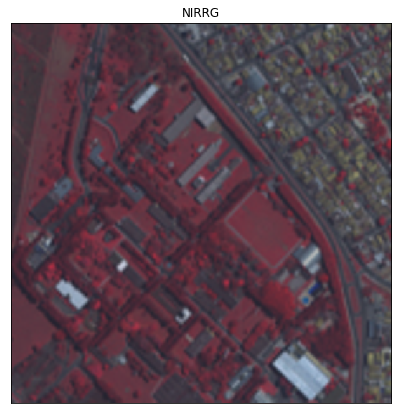

In [10]:
fig = plt.figure(figsize = (15, 7))

plt.imshow(nirrg)
plt.title('NIRRG')
plt.xticks([])
plt.yticks([])

plt.show()

In [11]:
rgb_hsv = rgb.convert('HSV')
nirrg_hsv = nirrg.convert('HSV')

In [12]:
print(np.asarray(rgb)[20])
print(np.asarray(rgb_hsv)[20])

[[63 69 63]
 [63 69 63]
 [63 68 63]
 ...
 [57 67 63]
 [57 67 63]
 [58 68 62]]
[[ 85  22  69]
 [ 85  22  69]
 [ 85  18  68]
 ...
 [110  38  67]
 [110  38  67]
 [102  37  68]]
